In [1]:
##########################################################################
# Created on Sat Nov 05 23:06:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 7.3.1.Macaulay duration

$$B=\sum_{i=1}^{N}c_ie^{-yt_i}$$
where,\
B:bond price\
$c_i$:cashflow\
y:YTM\
$t_i$:term

$$D=-\frac{1}{B}\frac{dB}{dy}=\frac{\sum_{i=1}^{N}t_ic_ie^{-yt_i}}{B}=\sum_{i=1}^{N}t_i(\frac{c_ie^{-yt_i}}{B})$$
$c_ie^{-yt_i}/B$ is PV of cashflow in $t_i$ divided by bond price B, which is also the weight of $t_i$.

In [2]:
import numpy as np
def Mac_Duration(C,M,m,y,t):
    '''Define a function for calculating Macaulay duraion of a bond
    C:coupon
    M:par of bond
    m:coupon payment frequency per year
    y:YTM(continuous compound) 
    t:array of time to coupon payment date. Single number indicates zero rate bond'''
    if C==0:
        duration=t
    else:
        coupon=np.ones_like(t)*M*C/m
        NPV_coupon=np.sum(coupon*np.exp(-y*t))
        NPV_par=M*np.exp(-y*t[-1])
        Bond_value=NPV_coupon+NPV_par
        cashflow=coupon
        cashflow[-1]=M*(1+C/m)
        weight=cashflow*np.exp(-y*t)/Bond_value
        duration=np.sum(t*weight)
    return duration

In [3]:
C_TB0911=0.0369
m_TB0911=2
y_TB0911=0.024
T_TB0911=4
par=100

Tlist_TB0911=np.arange(1,m_TB0911*T_TB0911+1)/m_TB0911
D1_TB0911=Mac_Duration(C=C_TB0911,M=par,m=m_TB0911,y=y_TB0911,t=Tlist_TB0911)
print('Macaulay duration of 0911 at 2020/06/12 is ',round(D1_TB0911,4))

Macaulay duration of 0911 at 2020/06/12 is  3.7623


$$\Delta B\approx\frac{dB}{dy}\Delta y=-BD\Delta y\implies\Delta B/B\approx-D\Delta y$$
where,\
$\Delta B$:change of bond price\
$\frac{dB}{dy}$:First derivative of bond price B to yield to maturity y\
$\Delta y$:small change of YTM

In [4]:
import utils

price_before=utils.Bondprice_onediscount(C=C_TB0911,M=par,m=m_TB0911,y=y_TB0911,t=Tlist_TB0911)
print('Price of 0911 at 2020/06/12 is ',round(price_before,4))

Price of 0911 at 2020/06/12 is  104.8358


In [5]:
y_change=0.0005
price_change1=-D1_TB0911*price_before*y_change
print('price change of 0911 used Macaulay duration is ',round(price_change1,4))

price change of 0911 used Macaulay duration is  -0.1972


In [6]:
price_new1=price_before+price_change1
print('new price of 0911(approximate) is ',round(price_new1,4))

new price of 0911(approximate) is  104.6386


In [7]:
price_new2=utils.Bondprice_onediscount(C=C_TB0911,M=par,m=m_TB0911,y=y_TB0911+y_change,t=Tlist_TB0911)
print('new price of 0911(accurate) is ',round(price_new2,4))

new price of 0911(accurate) is  104.6388


## Relationship between coupon,YTM and Macaulay duration

In [8]:
C_list=np.linspace(0.02,0.06,200)
y_list=np.linspace(0.01,0.05,200)

D_list1=np.ones_like(C_list)
D_list2=np.ones_like(y_list)

for i in range(len(C_list)):
    D_list1[i]=Mac_Duration(C=C_list[i],M=par,m=m_TB0911,y=y_TB0911,t=Tlist_TB0911)
for i in range(len(y_list)):
    D_list2[i]=Mac_Duration(C=C_TB0911,M=par,m=m_TB0911,y=y_list[i],t=Tlist_TB0911)

/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/custom_python/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


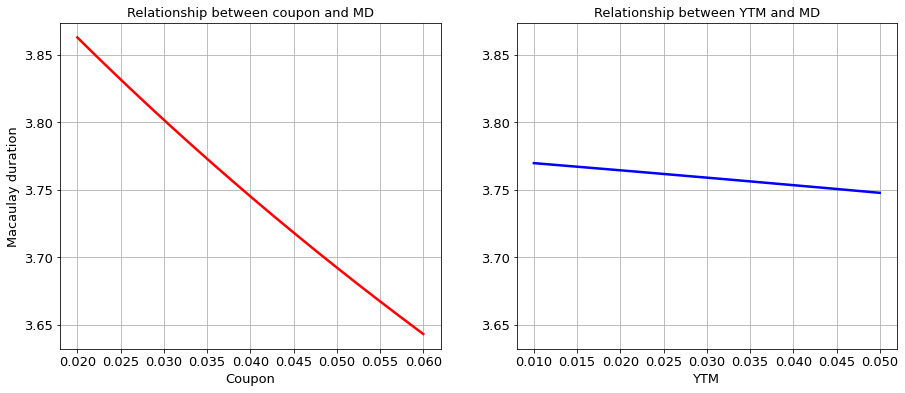

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(C_list,D_list1,'r-',lw=2.5)
plt.xlabel('Coupon',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Macaulay duration',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between coupon and MD',fontsize=13)
plt.grid()

plt.subplot(1,2,2,sharey=plt.subplot(1,2,1))
plt.plot(y_list,D_list2,'b-',lw=2.5)
plt.xlabel('YTM',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title('Relationship between YTM and MD',fontsize=13)
plt.grid()
plt.show()

# 7.3.2.Modified duration

Suppose YTM is not continuous compound but annual compound,\
$$\Delta B\approx-\frac{BD\Delta y}{1+y}$$\
Further,suppose YTM's compound frequency is m per year,\
$$\Delta B\approx-\frac{BD\Delta y}{1+y/m}$$\
Define a new variable called $D^*$, and\
$$D^*=\frac{D}{1+y/m}$$\
where,\
D: Macaulay duration\
y: YTM(compound m times per year)\
then $D^*$ is called modified duration and we have
$$\Delta B\approx-BD^*\Delta y$$

In [10]:
def Mod_Duration(C,M,m1,m2,y,t):
    '''Define a function for calculating Modified duraion of a bond
    C:coupon
    M:par of bond
    m1:coupon payment frequency per year
    m2:compound frequency per year of YTM, ordinary m2=m1
    y:YTM(compound m2 times per year) 
    t:array of time to coupon payment date. Single number indicates zero rate bond'''
    if C==0:
        Macaulay_duration=t
    else:
        r=m2*np.log(1+y/m2) #continuous compound
        coupon=np.ones_like(t)*M*C/m1
        NPV_coupon=np.sum(coupon*np.exp(-r*t))
        NPV_par=M*np.exp(-r*t[-1])
        price=NPV_coupon+NPV_par
        cashflow=coupon
        cashflow[-1]=M*(1+C/m1)
        weight=cashflow*np.exp(-r*t)/price
        Macaulay_duration=np.sum(t*weight)
    Modified_duration=Macaulay_duration/(1+y/m2)
    return Modified_duration

In [11]:
y1_TB0911=utils.Rm(Rc=y_TB0911,m=m_TB0911)
print('YTM(compound twice per year) of 0911 is ',round(y1_TB0911,6))

YTM(compound twice per year) of 0911 is  0.024145


In [13]:
D2_TB0911=Mod_Duration(C=C_TB0911,M=par,m1=m_TB0911,m2=m_TB0911,y=y1_TB0911,t=Tlist_TB0911)
print('Modified duration of 0911 is ',round(D2_TB0911,4))

Modified duration of 0911 is  3.7174


In [14]:
price_change2=-D2_TB0911*price_before*y_change
print('price change of 0911 used Modified duration is ',round(price_change2,4))

price change of 0911 used Modified duration is  -0.1949


In [15]:
price_new3=price_before+price_change2
print('new price of 0911(approximate) is ',round(price_new3,4))

new price of 0911(approximate) is  104.6409


In [17]:
yc_TB0911=utils.Rc(Rm=y1_TB0911+y_change,m=m_TB0911)
print('new YTM(continuous compound) of 0911 is ',round(yc_TB0911,6))

new YTM(continuous compound) of 0911 is  0.024494


In [18]:
price_new4=utils.Bondprice_onediscount(C=C_TB0911,M=par,m=m_TB0911,y=yc_TB0911,t=Tlist_TB0911)
print('new price of 0911(accurate) is ',round(price_new4,4))

new price of 0911(accurate) is  104.6411


# 7.3.3.Dollar duration

Dollar duration(absolute value duration) is defined as \
$$D_s=BD^*$$
thus,we have
$$\Delta B\approx -D_s\Delta y$$

In [19]:
def Dollar_Duration(C,M,m1,m2,y,t):
    '''Define a function for calculating Modified duraion of a bond
    C:coupon
    M:par of bond
    m1:coupon payment frequency per year
    m2:compound frequency per year of YTM, ordinary m2=m1
    y:YTM(compound m2 times per year) 
    t:array of time to coupon payment date. Single number indicates zero rate bond'''
    r=m2*np.log(1+y/m2)
    if C==0:
        price=M*np.exp(-r*t)
        Macaulay_D=t
    else:
        coupon=np.ones_like(t)*M*C/m1
        NPV_coupon=np.sum(coupon*np.exp(-r*t))
        NPV_par=M*np.exp(-r*t[-1])
        price=NPV_coupon+NPV_par
        cashflow=coupon
        cashflow[-1]=M*(1+C/m1)
        weight=cashflow*np.exp(-r*t)/price
        Macaulay_D=np.sum(t*weight)
    Modified_D=Macaulay_D/(1+y/m2)
    Dollar_D=price*Modified_D
    return Dollar_D

In [20]:
D3_TB0911=Dollar_Duration(C=C_TB0911,M=par,m1=m_TB0911,m2=m_TB0911,y=y1_TB0911,t=Tlist_TB0911)
print('Dollar duration of 0911 is ',round(D3_TB0911,2))

Dollar duration of 0911 is  389.72
